# MS Lesion Segmentation Visualization

## Import Libraries

In [1]:
import siibra
import nilearn
import os
import json
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from nilearn import datasets
from nilearn import plotting
from nilearn import image


[siibra:INFO] Version: 1.0a11
[siibra:WARNING] This is a development release. Use at your own risk.
[siibra:INFO] Please file bugs and issues at https://github.com/FZJ-INM1-BDA/siibra-python.


## Setting up Paths

In [2]:
path = "D:/User/Salvarki/Desktop/Tesi WorkSpace/ShiftChallenge/Experiments/SegResNet/predictions"

## Plotting Predictions

In [3]:
pred = nilearn.image.load_img(path + "/1_pred_prob.nii.gz")
seg = nilearn.image.load_img(path + "/1_pred_seg.nii.gz")
uncs = (path + "/1_uncs_rmi.nii.gz")
img = "D:/User/Salvarki/Desktop/Tesi WorkSpace/ShiftChallenge/Dataset/ShiftsDatasetCombinedExtracted/Test/FLAIR/1_FLAIR_isovox.nii"
gt = "D:/User/Salvarki/Desktop/Tesi WorkSpace/ShiftChallenge/Dataset/ShiftsDatasetCombinedExtracted/Test/GroundTruth/1_gt_isovox.nii"

In [4]:
fg = 'd:/User/Salvarki/Desktop/Tesi WorkSpace/ShiftChallenge/Dataset/ShiftsDatasetCombinedExtracted/Test/FgMasks/1_isovox_fg_mask.nii'

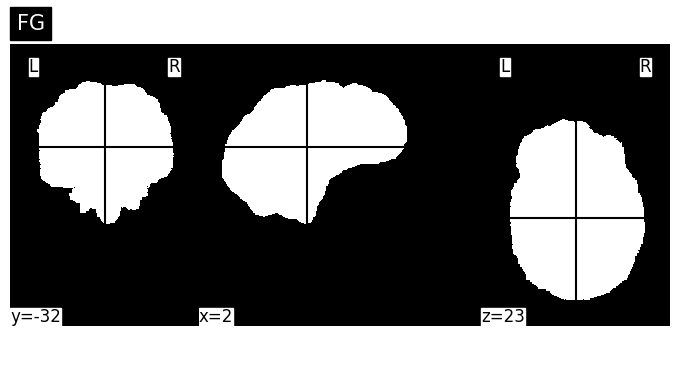

In [5]:
nilearn.plotting.plot_img(fg, title="FG", cmap = "bone")

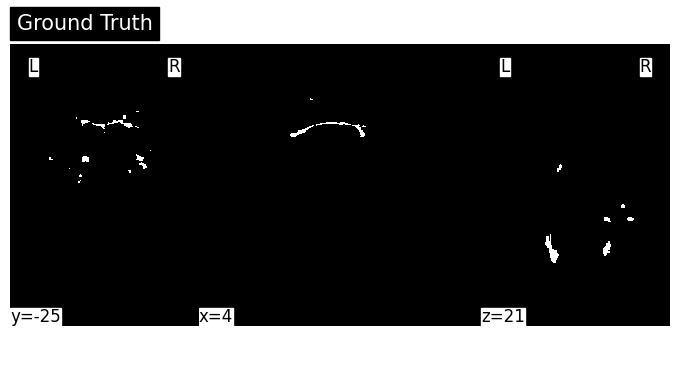

In [6]:
nilearn.plotting.plot_img(gt, title="Ground Truth", cmap = "bone", cut_coords=(4,-25,21))

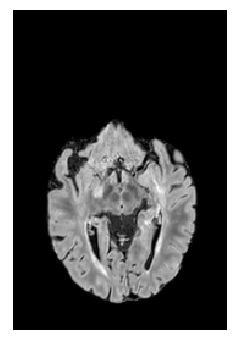

In [7]:
nilearn.plotting.plot_img(img, title=None, cmap="gray", display_mode="z", cut_coords=[10], annotate=False, black_bg=False)

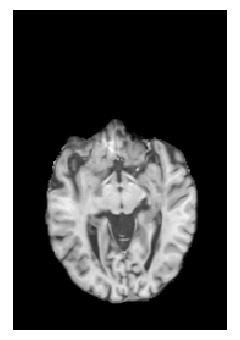

In [8]:
t1 = "D:/User/Salvarki/Desktop/Tesi WorkSpace\ShiftChallenge/Dataset/msseg/eval_in/t1/1_T1_isovox.nii.gz"
nilearn.plotting.plot_img(t1, title=None, cmap="gray", display_mode="z", cut_coords=[10], annotate=False, black_bg=False)

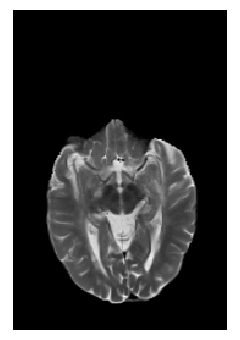

In [9]:
t2 = "D:/User/Salvarki/Desktop/Tesi WorkSpace\ShiftChallenge/Dataset/msseg/eval_in/t2/1_T2_isovox.nii.gz"
nilearn.plotting.plot_img(t2, title=None, cmap="gray", display_mode="z", cut_coords=[10], annotate=False, black_bg=False)

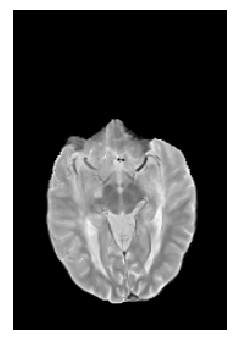

In [10]:
pd = "D:/User/Salvarki/Desktop/Tesi WorkSpace\ShiftChallenge/Dataset/msseg/eval_in/pd/1_PD_isovox.nii.gz"
nilearn.plotting.plot_img(pd, title=None, cmap="gray", display_mode="z", cut_coords=[10], annotate=False, black_bg=False)

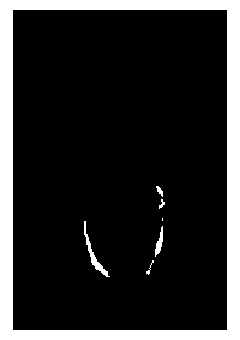

In [11]:
nilearn.plotting.plot_img(seg, title=None, cmap="bone", display_mode="z", cut_coords=[10], annotate=False)

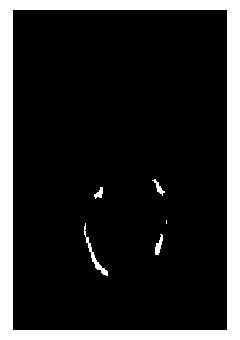

In [11]:
nilearn.plotting.plot_img(gt, title=None, cmap="bone", display_mode="z", cut_coords=[10], annotate=False)

### FLAIR

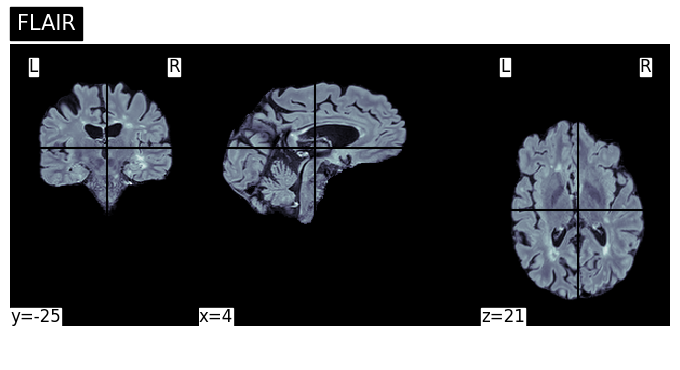

In [7]:
nilearn.plotting.plot_img(img, title="FLAIR", cmap = "bone")

### Prediction

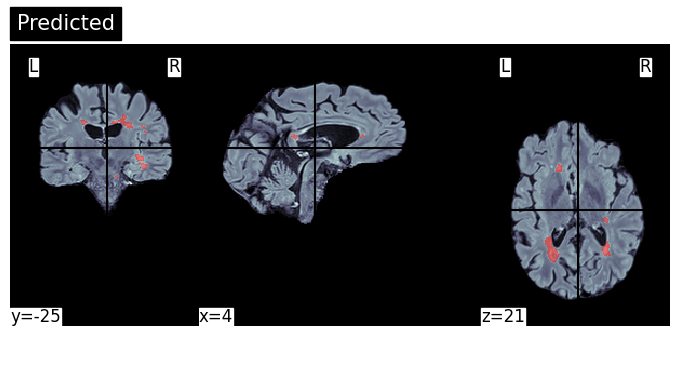

In [8]:
nilearn.plotting.plot_img(img, title="Predicted", cmap = "bone").add_overlay(seg, cmap="red_transparent", alpha=1)

### Ground Truth

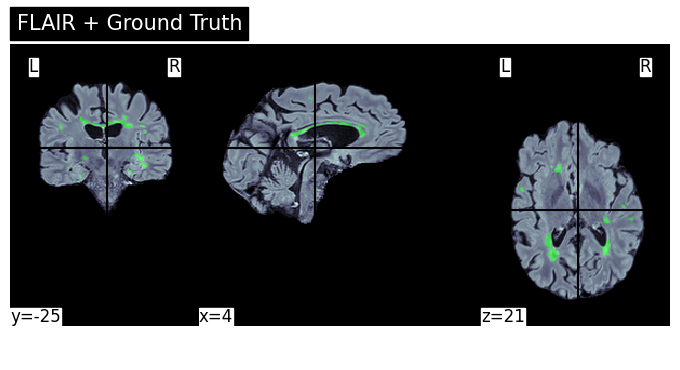

In [9]:
nilearn.plotting.plot_img(img, title="FLAIR + Ground Truth", cmap = "bone").add_overlay(gt, cmap="green_transparent", alpha=1)

### Segmentation

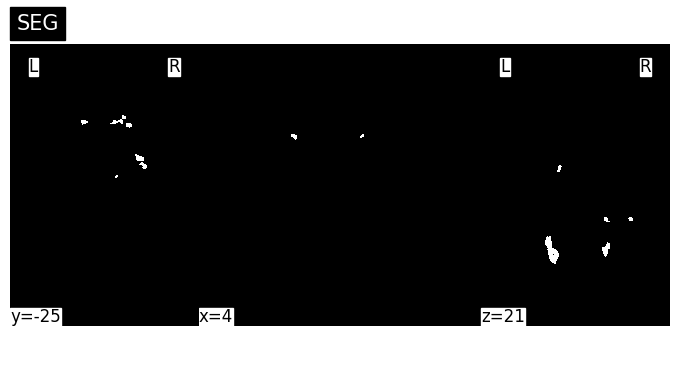

In [10]:

nilearn.plotting.plot_img(seg, title="SEG", display_mode="ortho", cmap = "bone", cut_coords=(4,-25,21))
#nilearn.plotting.plot_img(pred, title="PRED", cmap = "bone")


### unc maps

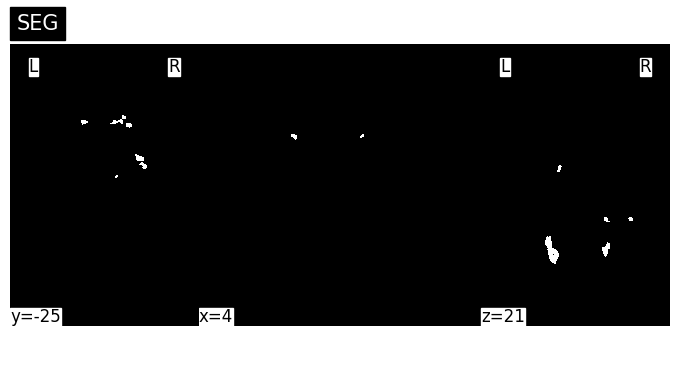

In [11]:
import matplotlib.pyplot as plt
import nibabel as nib

# Load the saved uncertainty map
uncs_map_data = nib.load(uncs)

#plot the uncertainty map
nilearn.plotting.plot_img(seg, title="SEG", display_mode="ortho", cmap = "bone", cut_coords=(4,-25,21))

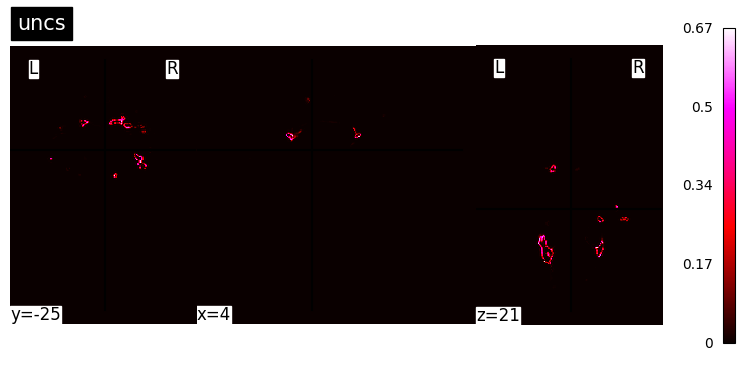

In [19]:
nilearn.plotting.plot_img(uncs_map_data, title="uncs", display_mode="ortho", cmap = "black_pink", cut_coords=(4,-25,21), colorbar=True)

### Uncs+seg

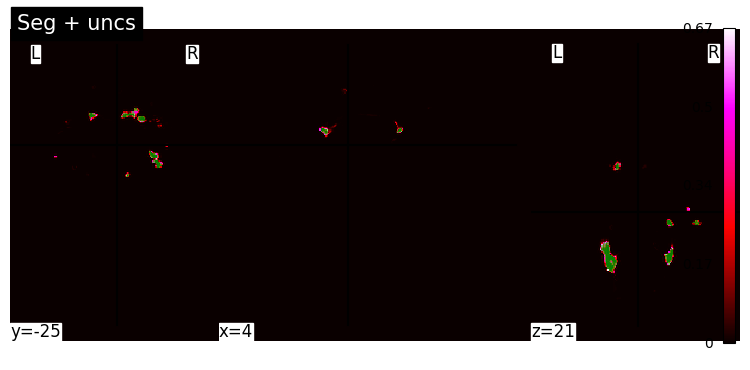

In [12]:

import matplotlib.pyplot as plt
import nibabel as nib
import nilearn.plotting

# Load the saved uncertainty map
uncs_map_data = nib.load(uncs)

# Assuming `seg` is already defined
p = nilearn.plotting.plot_img(uncs_map_data, title="Seg + uncs", display_mode="ortho", cmap = "black_pink", cut_coords=(4,-25,21), colorbar=True)
p.add_overlay(seg, cmap= "green_transparent", alpha=1)



### seg+uncs

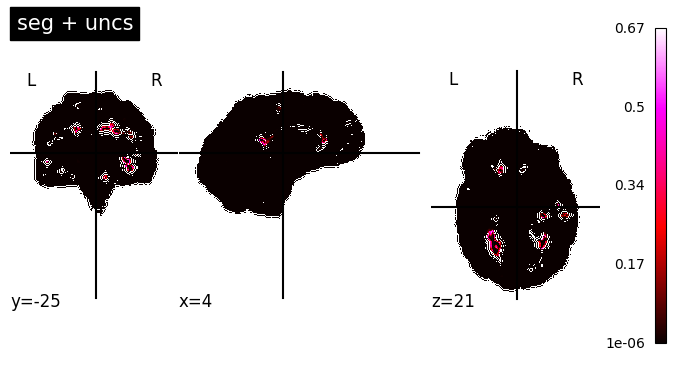

In [31]:
#nilearn.plotting.plot_img(seg, title="seg + uncs", display_mode="ortho", cmap = "binary", cut_coords=(4,-25,21)).add_overlay(uncs_map_data, cmap="black_pink", alpha=1, colorbar=True)
nilearn.plotting.plot_img(seg, title="seg + uncs", display_mode="ortho", cmap = "binary", cut_coords=(4,-25,21)).add_overlay(uncs_map_data, cmap = "black_pink", colorbar=True)

## Web Browser Lesion Atlas

In [11]:

# Load the brain MRI image and segmentation mask
brain_mri = "D:/User/Salvarki/Desktop/Tesi WorkSpace/ShiftChallenge/Dataset/ShiftsDatasetCombinedExtracted/Test/FLAIR/1_FLAIR_isovox.nii"
segmentation_mask = path + "/1_pred_seg.nii.gz"
ground_truth_mask = "D:/User/Salvarki/Desktop/Tesi WorkSpace/ShiftChallenge/Dataset/ShiftsDatasetCombinedExtracted/Test/GroundTruth/1_gt_isovox.nii"

# Load the images
brain_img = image.load_img(brain_mri)
seg_img = image.load_img(segmentation_mask)
gt_img = image.load_img(ground_truth_mask)

# Create a thresholded version of the segmentation mask and the ground truth mask
seg_img_thr = image.load_img(seg_img)
gt_img_thr = image.load_img(gt_img)

# Plotting
view_seg = plotting.view_img_on_surf(seg_img_thr, surf_mesh='fsaverage', title='Predicted Segmentation')
view_gt = plotting.view_img_on_surf(gt_img_thr, surf_mesh='fsaverage', title='Ground Truth')

# Open the plots in a web browser
view_seg.open_in_browser()
view_gt.open_in_browser()

## Lesion Atlas

In [12]:
# Load the brain MRI image and segmentation mask
brain_mri = "D:/User/Salvarki/Desktop/Tesi WorkSpace/ShiftChallenge/Dataset/ShiftsDatasetCombinedExtracted/Test/FLAIR/1_FLAIR_isovox.nii"
segmentation_mask = path + "/1_pred_seg.nii.gz"

# Load the images
brain_img = nib.load(brain_mri)
seg_img = nib.load(segmentation_mask)

In [13]:
# Load the MNI152 template
mni = datasets.load_mni152_template()

#normalize
brain_img_norm = nib.Nifti1Image(brain_img.get_fdata(), affine = mni.affine)
seg_img_norm = nib.Nifti1Image(seg_img.get_fdata(), affine = mni.affine)
brain_img_norm = image.resample_to_img(brain_img, mni, interpolation='nearest')
seg_img_norm  = image.resample_to_img(seg_img, mni, interpolation='nearest')

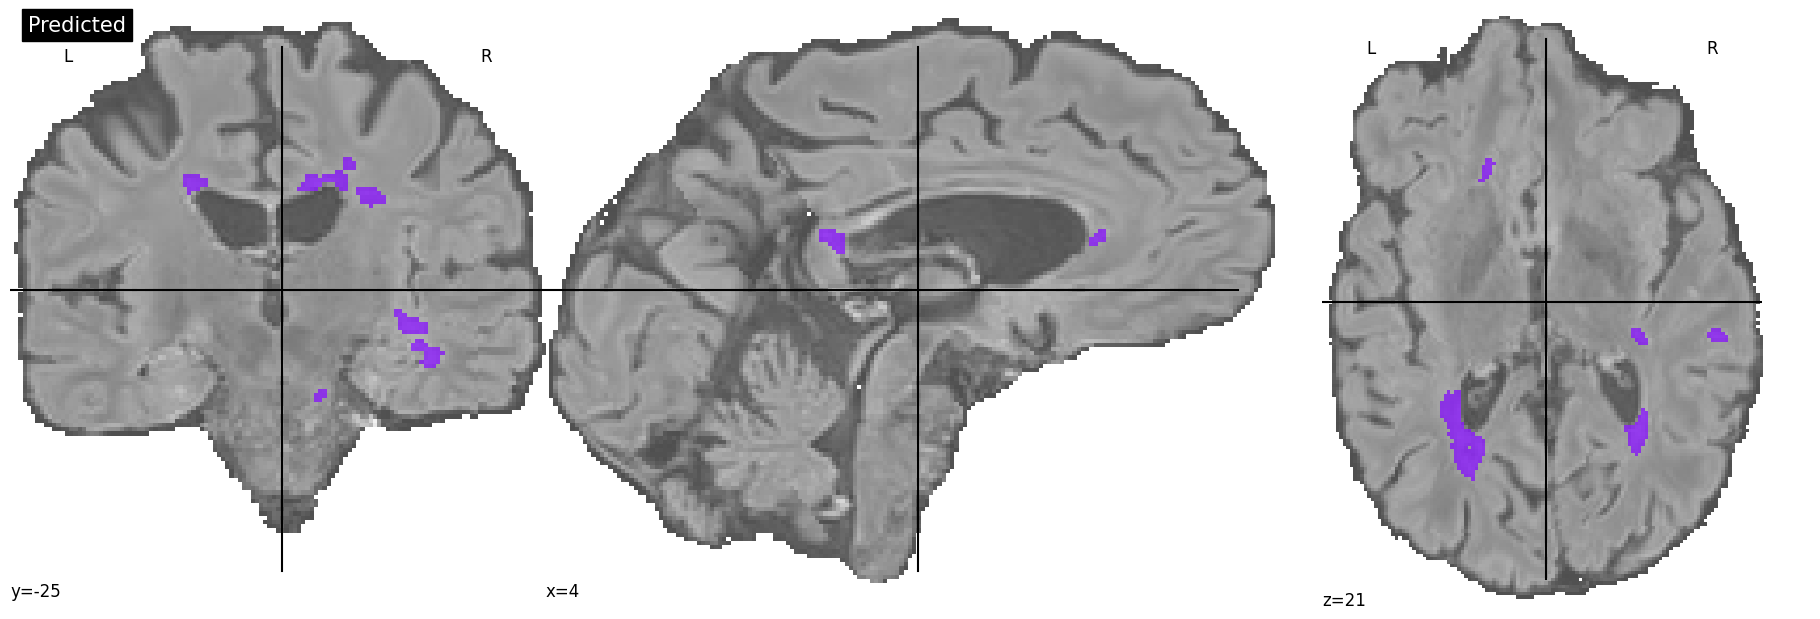

In [14]:
fig = plt.figure(figsize=(18, 6))
plotting.plot_roi(roi_img=seg_img_norm, bg_img=brain_img_norm, cut_coords=(4,-25,21), display_mode='ortho', title="Predicted", cmap = "rainbow", figure=fig, black_bg=False)
plotting.show()

In [15]:
points = siibra.PointSet(tuple(zip(*np.where(seg_img_norm.get_fdata() == 1))), space='mni152', sigma_mm=5).transform(mni.affine, space='mni152')
plotting.view_markers(list(map(tuple, points)), marker_color= 'red', marker_size=1, title="Predicted lesions")

Loading preconfigured Space instances: 100%|██████████| 9/9 [00:00<00:00, 350.96Space/s]


# Julich Brain Lesions Areas

In [16]:
atlas = siibra.atlases.get('human')
parcellations = list(atlas.parcellations)
julich_brain = atlas.parcellations.get('julich brain 3.0.3')

Loading preconfigured Atlas instances:   0%|          | 0/4 [00:00<?, ?Atlas/s]

Loading preconfigured Parcellation instances: 100%|██████████| 27/27 [00:00<00:00, 137.17Parcellation/s]


In [17]:
def get_affected_areas(parcellation, volume, top_n, verbose = False):
    atlas = siibra.atlases.get('human')
    julich_brain = atlas.get_parcellation(parcellation=parcellation)
    # Print some information about the parcellation
    if verbose:
        print(f'Name:     {julich_brain.name}')
        print(f'ID:       {julich_brain.id}')
        print(f'Modality: {julich_brain.modality}\n')
        print(f'{julich_brain.description}\n')
        for p in julich_brain.publications:
            print(p['citation'])
        print('\n\n')
    julich_p_maps = siibra.get_map(
        parcellation=julich_brain,
        space=siibra.spaces.get('mni152'),
        maptype=siibra.MapType.LABELLED
    )
    # Assign the volume to the regions and get the top_n most affected regions
    assigments = julich_p_maps.assign(volume)
    top_r = assigments['region'].value_counts()[:top_n]
    # Header for the table
    print(''.join(['> ' for i in range (40)]))
    print(f'\n{"REGION":>40}{"%_of_Lesion":>15}{"%_of_Region":>15}\n')
    print(''.join(['> 'for i in range (40)]))

    results = {}
    for i, v in enumerate(top_r.index):
        p_map = julich_p_maps.fetch(region=v)
        n_vox = np.unique(p_map.get_fdata(), return_counts=True)[1][1]
        results[str(v)] = {}
        results[str(v)]['Percentage of Lesion'] = round(top_r.iloc[i]/len(assigments)*100, 2)
        results[str(v)]['Percentage of Region'] = round(top_r.iloc[i]/n_vox*100, 2)
        print(f'{str(v):>40}{(top_r.iloc[i]/len(assigments)*100):>15.2f}{(top_r.iloc[i]/n_vox*100):>15.2f}')
    return results


In [18]:
areas = get_affected_areas(
    parcellation = parcellations[12].name,
    volume = points,
    top_n = 5,
    verbose = False
)

Loading preconfigured Map instances: 100%|██████████| 58/58 [00:02<00:00, 28.90Map/s]
[siibra:WARNING] Map registry contains multiple classes: Map, SparseMap


> > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > 

                                  REGION    %_of_Lesion    %_of_Region

> > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > 
      Frontal-to-Occipital (GapMap) left          26.88           6.04
     Frontal-to-Occipital (GapMap) right          16.82           4.08
          Area hOc1 (V1, 17, CalcS) left           8.88           7.31
                    Area hOc6 (POS) left           4.23          51.55
    Frontal-to-Temporal-II (GapMap) left           3.10           2.86


In [23]:
# Get the current directory
current_dir = os.getcwd()

# Specify the file path for saving the JSON file
file_path = os.path.join(current_dir, "1_ms_lesion_areas_.json")

# Save the JSON file
with open(file_path, "w") as file:
    json.dump(areas, file)


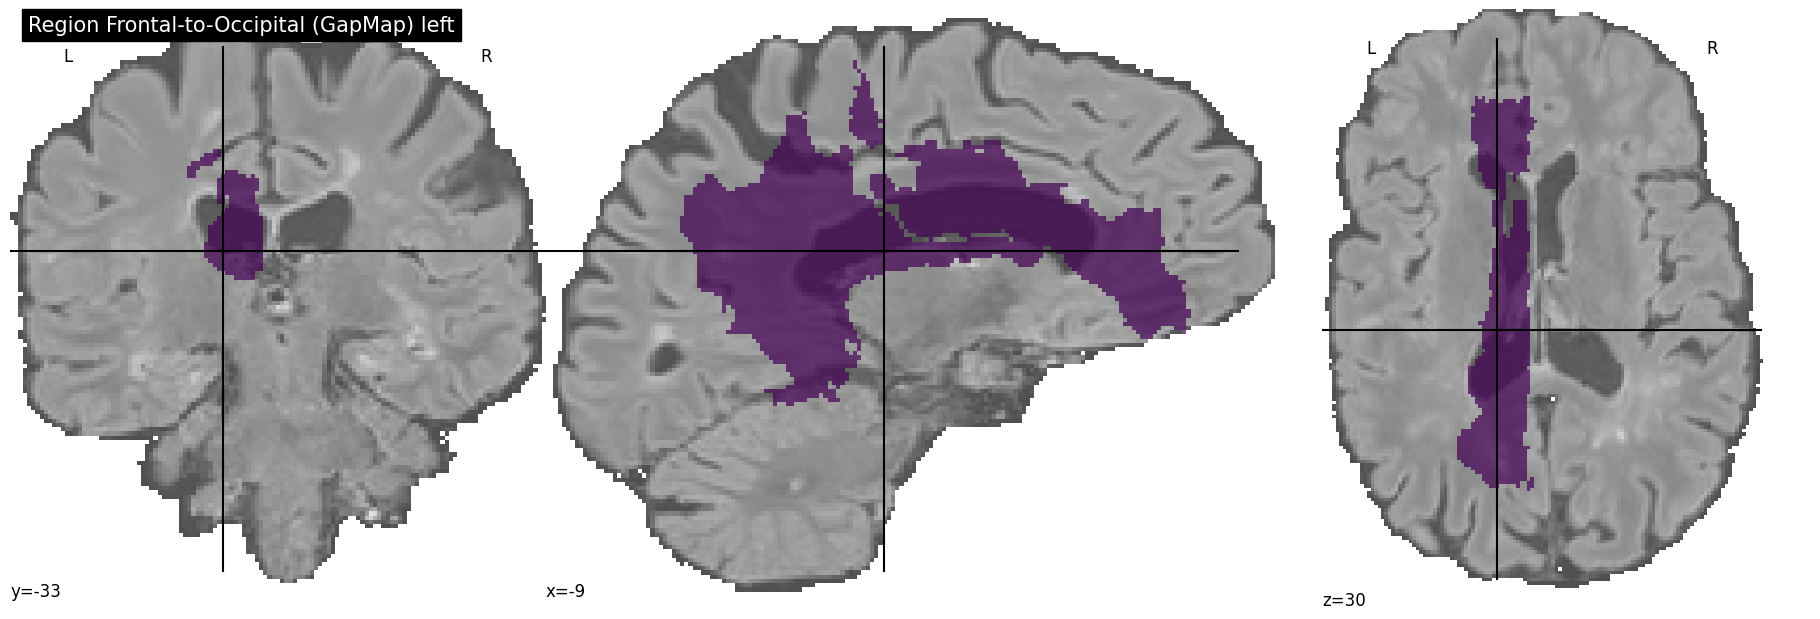

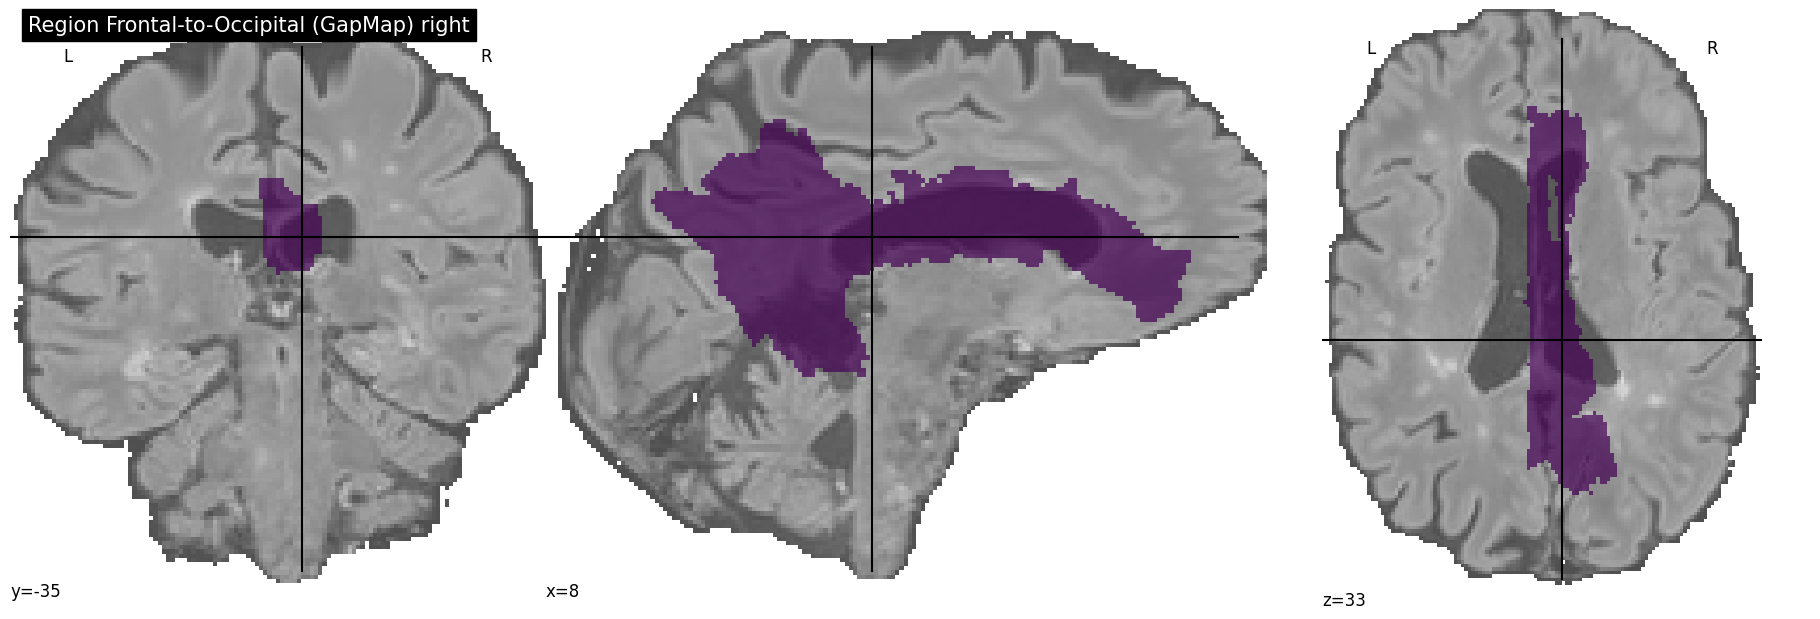

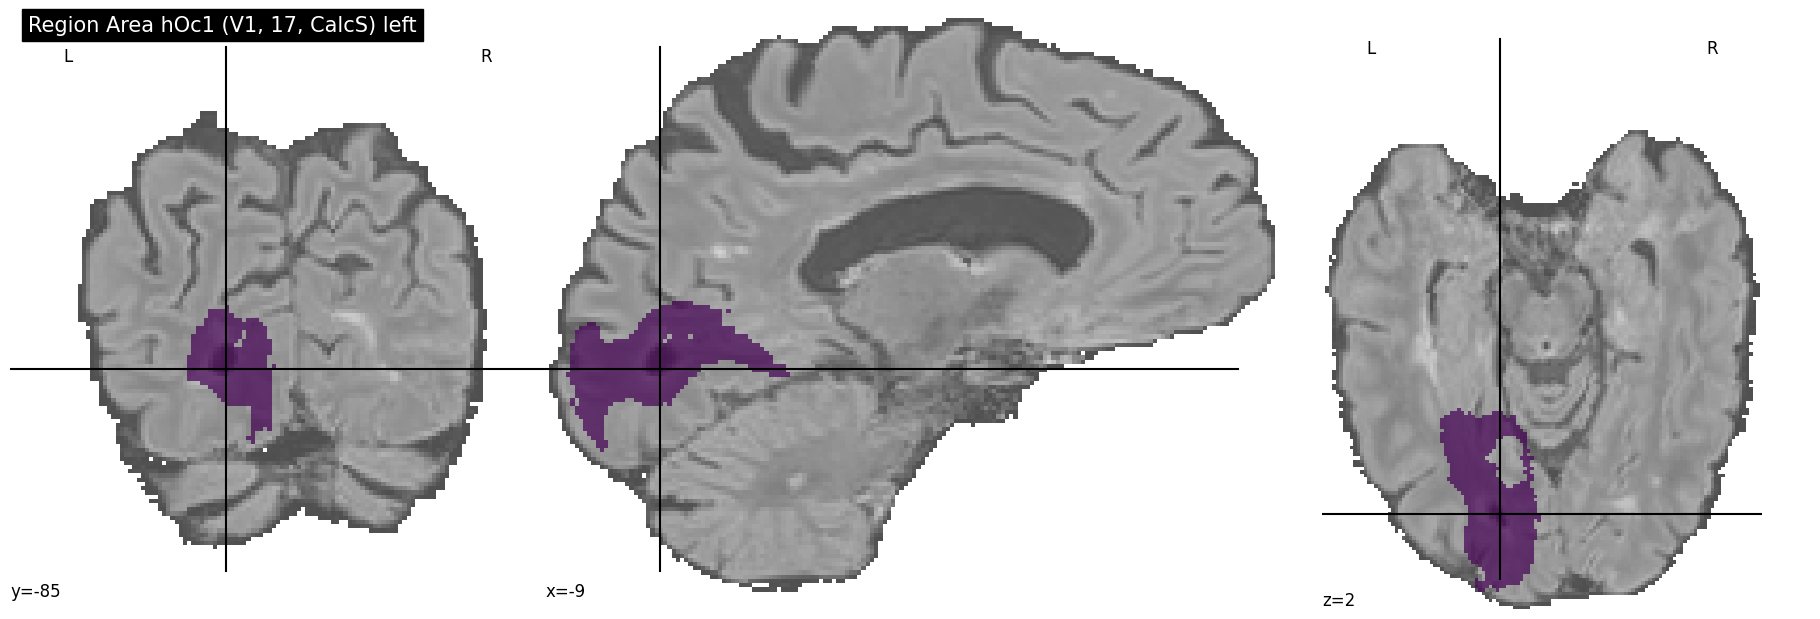

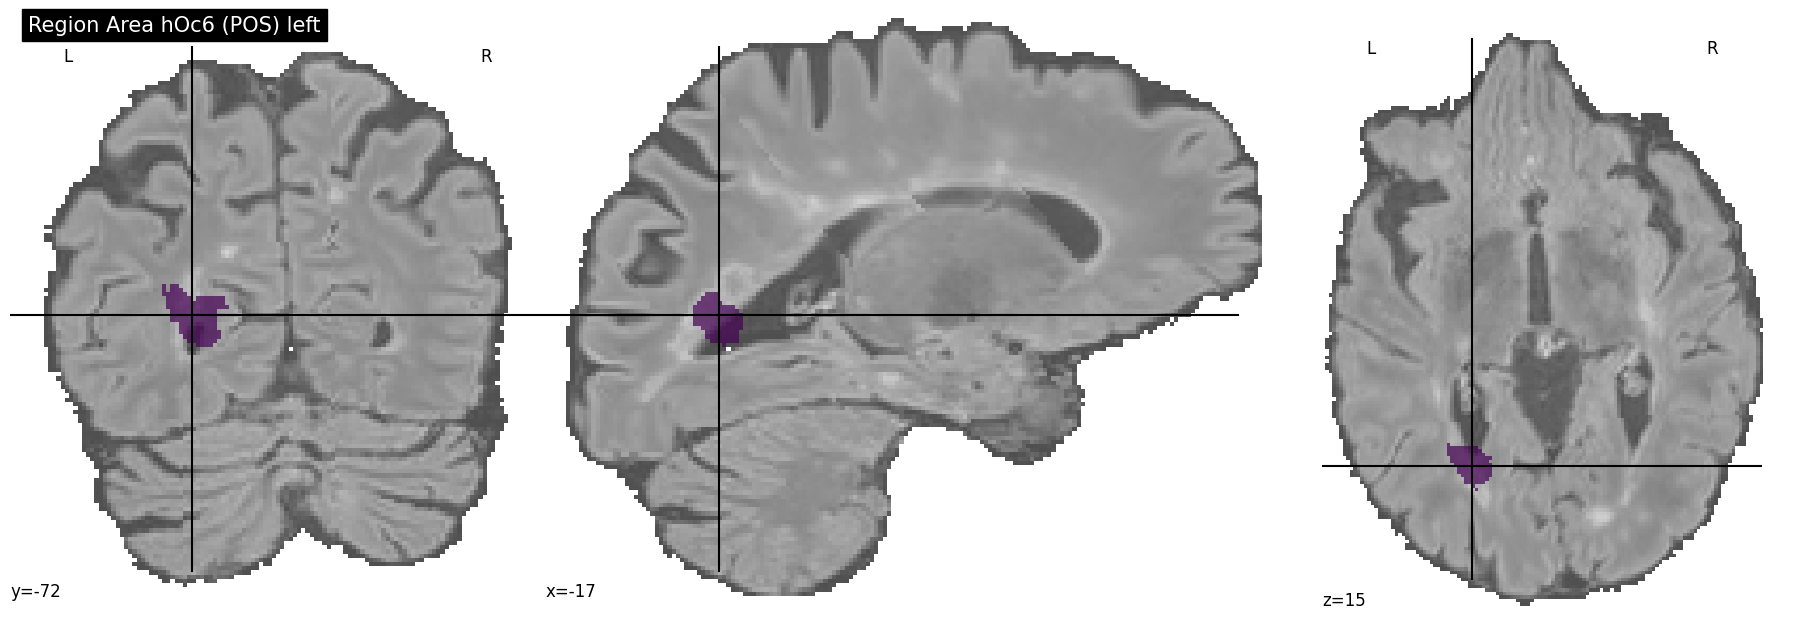

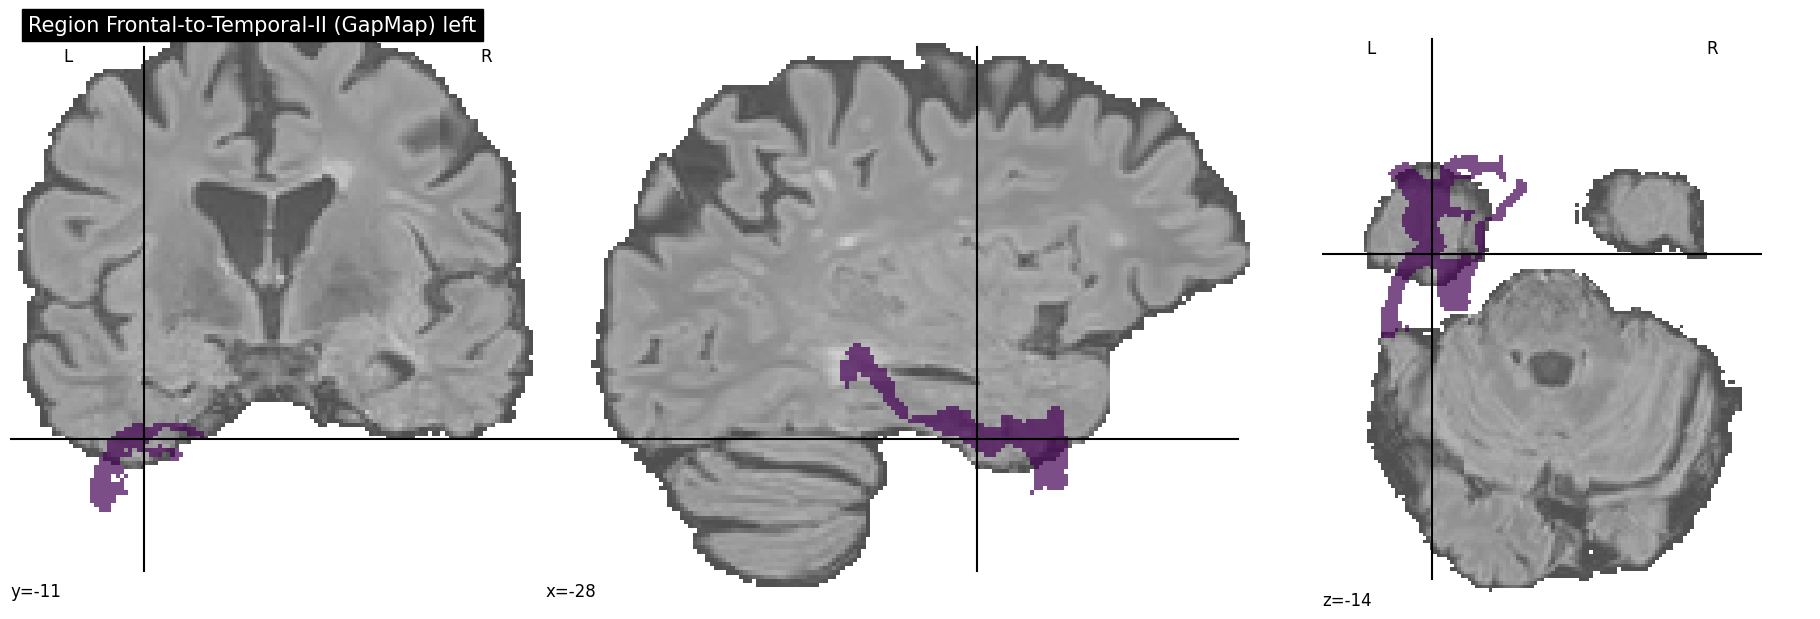

In [20]:
julich_pmaps = siibra.get_map(
    parcellation=siibra.parcellations.get(parcellations[12].name),
    space=siibra.spaces.get('mni152'),
    maptype=siibra.MapType.LABELLED
)
for a in areas:
    fig = plt.figure(figsize=(18, 6))
    plotting.plot_roi(
        roi_img=julich_pmaps.fetch(region=a),
        bg_img=brain_img_norm,
        title=f"Region {a}",
        cmap = "viridis",
        figure=fig,
        black_bg=False
    )
    plotting.show()